In [1]:
import urllib.request
import gzip
import os
from string import ascii_lowercase as lowercase
import matplotlib.pyplot as plt
import networkx as nx

Download the file if it doesn't exist

In [2]:
if not os.path.exists("words_dat.txt.gz"):
    print("Downloading words_dat.txt.gz...")
    url = "https://github.com/networkx/networkx/blob/main/examples/graph/words_dat.txt.gz?raw=true"
    urllib.request.urlretrieve(url, "words_dat.txt.gz")
    print("Download complete.")

Download complete.


Generating the Word Graph

In [3]:
def generate_graph(words):
    G = nx.Graph(name="words")
    lookup = {c: lowercase.index(c) for c in lowercase}

    def edit_distance_one(word):
        for i in range(len(word)):
            left, c, right = word[0:i], word[i], word[i + 1 :]
            j = lookup[c]  # lowercase.index(c)
            for cc in lowercase[j + 1 :]:
                yield left + cc + right

    candgen = (
        (word, cand)
        for word in sorted(words)
        for cand in edit_distance_one(word)
        if cand in words
    )
    G.add_nodes_from(words)
    for word, cand in candgen:
        G.add_edge(word, cand)
    return G

In [4]:
def words_graph():
    fh = gzip.open("words_dat.txt.gz", "r")
    words = set()
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):
            continue
        w = str(line[0:5])
        words.add(w)
    return generate_graph(words)

In [6]:
G = words_graph()
print(G)
print(f"{nx.number_connected_components(G)} connected components")

Graph named 'words' with 5757 nodes and 14135 edges
853 connected components


In [7]:
# Calculate the degree of each node in the graph
node_degrees = dict(G.degree())

# Display the degrees of the nodes
for node, degree in node_degrees.items():
    print(f"Node {node} has degree {degree}")

Node lasso has degree 1
Node amuse has degree 1
Node chefs has degree 3
Node cores has degree 25
Node envoy has degree 2
Node rifle has degree 1
Node wales has degree 21
Node clasp has degree 3
Node covet has degree 7
Node vitro has degree 1
Node roger has degree 3
Node amigo has degree 1
Node fetid has degree 1
Node civet has degree 2
Node redid has degree 2
Node momma has degree 3
Node prats has degree 7
Node there has degree 4
Node force has degree 3
Node faced has degree 14
Node plies has degree 3
Node ajuga has degree 0
Node upper has degree 1
Node swirl has degree 2
Node eking has degree 1
Node bedew has degree 0
Node pupas has degree 4
Node plein has degree 1
Node towns has degree 3
Node nosed has degree 6
Node whats has degree 5
Node mates has degree 23
Node gourd has degree 0
Node milch has degree 3
Node stake has degree 10
Node irked has degree 1
Node tepid has degree 0
Node disks has degree 7
Node titer has degree 9
Node shaky has degree 4
Node waxed has degree 11
Node axons

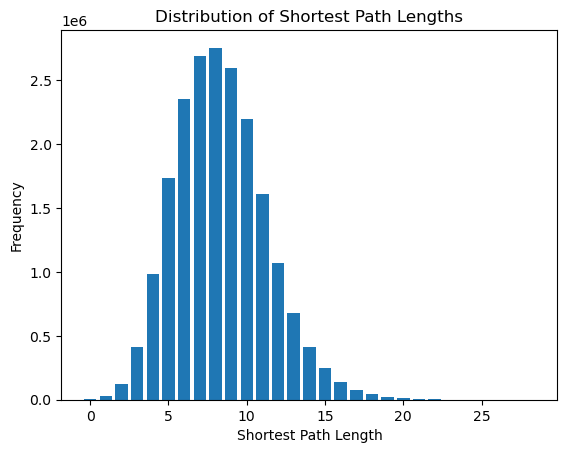

In [8]:
# Calculate the shortest path lengths between all pairs of nodes
all_shortest_paths = dict(nx.shortest_path_length(G))

# Calculate the distribution of path lengths
path_lengths = [length for paths in all_shortest_paths.values() for length in paths.values()]

# Display the distribution of path lengths
plt.hist(path_lengths, bins=range(min(path_lengths), max(path_lengths) + 1), align='left', rwidth=0.8)
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Shortest Path Lengths')
plt.show()